# CDS503: Machine Learning

***
## LAB 4: Naive Bayes (NB)

In this lab, we will be taking a *closer* look at **naive Bayes classification**.

Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets. Because they are so fast and have so few tunable parameters, they end up being very useful as a *quick-and-dirty* **baseline** for a classification problem. This lab will focus on an *intuitive* explanation of how naive Bayes classifiers **work**, followed by a couple examples of them in action on some datasets.

***

***
### Step1: Business Understanding

***

This data was extracted from the census bureau database found at: http://www.census.gov/ftp/pub/DES/www/welcome.html. It contains the cencus income of the people. They are trying to see the income of more than 50k and less than 50k.
| Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
| Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)

<img src="Part 1.png" style="width:80%;margin-left:auto;margin-right:auto;">

***
### Bayesian Classification

Naive Bayes classifiers are built on Bayesian classification methods.
These rely on **Bayes's theorem**, which is an equation describing the *relationship* of **conditional probabilities** of statistical quantities.
In Bayesian classification, we're interested in finding the **probability** of a label *given* some **observed** features, which we can write as $P(L~|~{\rm features})$.
Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

If we are trying to decide between two labels—let's call them $L_1$ and $L_2$—then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$

All we need now is some model by which we can compute $P({\rm features}~|~L_i)$ for each label.
Such a model is called a *generative model* because it specifies the hypothetical random process that generates the data.
Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier.
The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

**What does it mean?** For example, it means we have to assume that the comfort of the room on the Titanic is *independent* of the fare ticket. This **assumption** is absolutely *wrong* and it is why it is called **Naive**. It allows to simplify the calculation, even on very large datasets.

***
### Different distribution function

To begin to implement a classifier, there is a few probability model *options* in the `sklearn` python library. They are:

-  **Gaussian**: It *assumes* that **continuous features** follow a normal distribution.

<img src="02a.png" style="width:70%;margin-left:auto;margin-right:auto;">

-  **Multinomial**: It is useful if your **features are discrete**.
-  **Bernoulli**: The binomial model is useful if your **features are binary**.

<img src="02b.png" style="width:70%;margin-left:auto;margin-right:auto;">

- **Bernoulli Naive Bayes** : It assumes that all our features are binary such that they take only two values. Means 0s can represent “word does not occur in the document” and 1s as "word occurs in the document" .

- **Multinomial Naive Bayes** : Its is used when we have discrete data (e.g. movie ratings ranging 1 and 5 as each rating will have certain frequency to represent). In text learning we have the count of each word to predict the class or label.

- **Gaussian Naive Bayes** : Because of the assumption of the normal distribution, Gaussian Naive Bayes is used in cases when all our features are continuous. For example in Iris dataset features are sepal width, petal width, sepal length, petal length. So its features can have different values in data set as width and length can vary. We can’t represent features in terms of their occurrences. This means data is continuous. Hence we use Gaussian Naive Bayes here.

**Different** types of naive Bayes classifiers rest on **different naive assumptions** about the data, and we will examine a few of these in the following sections. Here we implement a classic **Gaussian Naive Bayes** on the **Titanic Disaster** dataset. We begin with the *standard library imports*.

<img src="Part 2.png" style="width:80%;margin-left:auto;margin-right:auto;">

### Step 2: Data Understanding

#### Description of the data:
In the censuc income data set, there are fifteen attributes including the class attribute indicating the class/category information. 
The 15 attributes are:
-  age: continuous.
-  workclass:
    - Private
    - Self-emp-not-inc
    - Self-emp-inc
    - Federal-gov
    - Local-gov
    - State-gov
    - Without-pay
    - Never-worked
- fnlwgt: continuous.
- education: 
    - Bachelors 
    - Some-college
    - 11th
    - HS-grad
    - Prof-school
    - Assoc-acdm
    - Assoc-voc
    - 9th
    - 7th-8th
    - 12th
    - Masters
    - 1st-4th
    - 10th
    - Doctorate
    - 5th-6th
    - Preschool
- education-num: continuous.
- marital-status: 
    - Married-civ-spouse
    - Divorced
    - Never-married
    - Separated
    - Widowed
    - Married-spouse-absent
    - Married-AF-spouse
- occupation: 
    - Tech-support
    - Craft-repair
    - Other-service
    - Sales
    - Exec-managerial
    - Prof-specialty
    - Handlers-cleaners
    - Machine-op-inspct
    - Adm-clerical
    - Farming-fishing
    - Transport-moving
    - Priv-house-serv
    - Protective-serv
    - Armed-Forces
- relationship: 
    - Wife
    - Own-child
    - Husband
    - Not-in-family
    - Other-relative
    - Unmarried
- race: 
    - White
    - Asian-Pac-Islander
    - Amer-Indian-Eskimo
    - Other
    - Black
- sex: 
    - Female
    - Male
- capital-gain: continuous
- capital-loss: continuous
- hours-per-week: continuous.
- native-country: 
    - United-States
    - Cambodia
    - England
    - Puerto-Rico
    - Canada
    - Germany
    - Outlying-US(Guam-USVI-etc)
    - India
    - Japan
    - Greece
    - South
    - China
    - Cuba
    - Iran
    - Honduras
    - Philippines
    - Italy
    - Poland
    - Jamaica
    - Vietnam
    - Mexico
    - Portugal
    - Ireland
    - France
    - Dominican-Republic
    - Laos
    - Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador,    Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
%matplotlib inline

In [2]:
# import library to display multiple outputs
from IPython.display import display

# Importing dataset
train = pd.read_csv("input/adult_train_modified.csv")
test = pd.read_csv("input/adult_test_modified.csv")

# see some of it, their overall statistics and dimensions
display(train.head(5))
display(train.describe())
display(train.shape)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Class
0,22,5,2491,9,12,4,0,1,4,1,24,0,39,38,0
1,33,4,2727,9,12,2,3,0,4,1,0,0,12,38,0
2,21,2,13188,11,8,0,5,1,4,1,0,0,39,38,0
3,36,2,14354,1,6,2,5,0,2,1,0,0,39,38,0
4,11,2,18120,9,12,2,9,5,2,0,0,0,39,4,0


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Class
count,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,21.435482,2.199324,9825.221504,10.333764,9.121312,2.580134,5.959850,1.418341,3.678602,0.675685,6.552450,2.072641,39.871527,36.382567,0.248922
std,13.125355,0.953925,5671.017927,3.812292,2.549995,1.498016,4.029566,1.601338,0.834709,0.468126,23.284819,10.028470,11.771826,6.105372,0.432396
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,2.000000,5025.250000,9.000000,8.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,39.000000,38.000000,0.000000
50%,20.000000,2.000000,9689.500000,11.000000,9.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,39.000000,38.000000,0.000000
75%,30.000000,2.000000,14520.750000,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,44.000000,38.000000,0.000000
max,71.000000,6.000000,20262.000000,15.000000,15.000000,6.000000,13.000000,5.000000,4.000000,1.000000,117.000000,89.000000,93.000000,40.000000,1.000000


(30162, 15)

***
### Step 3: Data Preparation

We will clea our data by replace some missing values and encoding.

<img src="Part 3.png" style="width:80%;margin-left:auto;margin-right:auto;">

In [3]:
#new sample after cleaning
train.shape

(30162, 15)

In [4]:
#new sample after cleaning
test.shape

(15060, 15)

In [5]:
#Assign input column and label column for train data
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,14]

print(x_train)
print(y_train)

       age  workclass  fnlwgt  education  education-num  marital-status  \
0       22          5    2491          9             12               4   
1       33          4    2727          9             12               2   
2       21          2   13188         11              8               0   
3       36          2   14354          1              6               2   
4       11          2   18120          9             12               2   
...    ...        ...     ...        ...            ...             ...   
30157   10          2   15471          7             11               2   
30158   23          2    7555         11              8               2   
30159   41          2    7377         11              8               6   
30160    5          2   12060         11              8               4   
30161   35          3   16689         11              8               2   

       occupation  relationship  race  sex  capital-gain  capital-loss  \
0               0        

In [6]:
#Assign input column and label column for test data
x_test = test.iloc[:,:-1]
y_test = test.iloc[:,14]

print(x_test)
print(y_test)

       age  workclass  fnlwgt  education  education-num  marital-status  \
0        8          2    8315          1              6               4   
1       21          2    1754         11              8               2   
2       11          1   10750          7             11               2   
3       27          2    4780         15              9               2   
4       17          2    7091          0              5               4   
...    ...        ...     ...        ...            ...             ...   
15055   16          2    8927          9             12               4   
15056   22          2    7893          9             12               0   
15057   21          2   11193          9             12               2   
15058   27          2    1593          9             12               0   
15059   18          3    6062          9             12               2   

       occupation  relationship  race  sex  capital-gain  capital-loss  \
0               6        

Let's **clean** the data by *removing* the NaN data **completely**, and *replace* **categorical** values into **numeric** values:

***
### Step 4: Modelling
#### Classify using Naive Bayes


Here, weparate the *descriptive* features and the *target* feature (`Income`) of the data. We assign the **training** set and **testing** set. After the label encoding, the income now becomes (`0 for Income <=50k`) and (`1 for income >50k`).

<img src="Part 4.png" style="width:80%;margin-left:auto;margin-right:auto;">

### Step 5: Evaluation

<img src="Part 5.png" style="width:80%;margin-left:auto;margin-right:auto;">

Then, we train the **Gaussian Naive Bayes** classifier and test it to see its *performance* in term of **accuracy**. From there, we can observe the misclassified ones using the *confusion matrix*.

Number of mislabeled points out of a total 15060 points : 2800, performance 81.41%


Text(0.5, 24.0, 'Predicted label')

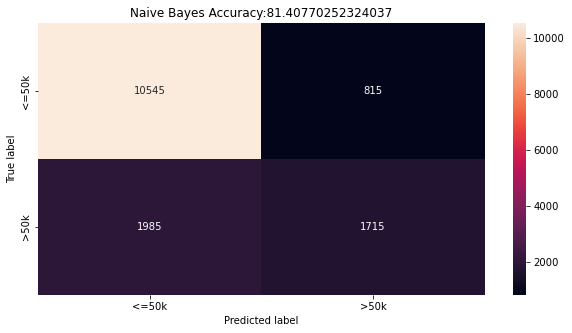

In [7]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
# Instantiate the classifier
gnb = GaussianNB()
#bnb = BernoulliNB()
#mnb = MultinomialNB()

# Train classifier
gnb.fit(x_train,y_train)
#bnb.fit(x_train,y_train)
#mnb.fit(x_train,y_train)

# Test the classifier
predict = gnb.predict(x_test)
#predict = bnb.predict(x_test)
#predict = mnb.predict(x_test)

# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(x_test.shape[0], (y_test != predict).sum(), 
              gnb.score(x_test,y_test)*100 ))

# Creates a confusion matrix
cm = confusion_matrix(y_test, predict)

# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index = ['<=50k','>50k'], 
                     columns = ['<=50k','>50k'])
# plot the confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title("Naive Bayes Accuracy:" + str(gnb.score(x_test,y_test)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')

***
### Summary

**Pros:**

-  Computationally **fast**
-  Simple to implement
-  Works well with **small datasets**
-  Works well with **high dimensions**
-  Perform well even if the Naive assumption is **not perfectly met**. In many cases, the approximation is enough to build a good classifier.

**Cons:**

-  Require to **remove correlated features** because they are voted twice in the model and it can lead to over inflating importance (overfitting problem).
- If a **categorical variable** has a category in *testing* data set which was **not observed** in *training* data set, then the model will assign a **zero probability** and **failed** to make a *prediction*. This is often known as **"Zero Frequency"**. To solve this, we can use the **smoothing technique**. One of the simplest smoothing techniques is called **Laplace estimation**. `sklearn` applies **Laplace smoothing** by default when you train a Naive Bayes classifier.